In [1]:
import keras
from keras.applications.resnet50 import ResNet50
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt
from six.moves import cPickle as pickle
from keras.models import Model

Using TensorFlow backend.


In [2]:
from keras.applications.vgg19 import VGG19
resnet = VGG19(include_top=False
                  ,input_shape=(128, 128, 3)
                  ,weights='imagenet'
                  ,pooling='avg')

for layer in resnet.layers:
    layer.trainable=False

fc1000_2 = Dense(1000, activation='relu', name='fc1000_2', kernel_initializer='he_normal')(resnet.output)
fc256 = Dense(256, activation='relu', name='fc256')(fc1000_2)
output = Dense(2, activation='softmax', name='last')(fc256)
model = Model(resnet.input, output, name='whole_Model')


# Show final model
model.summary()

# initiate optimizer
opt = keras.optimizers.adam(lr=0.001, decay=1e-6)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
bloc

In [3]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

batch_size = 32
input_size=(128, 128)

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
 
training_set = train_datagen.flow_from_directory('PS-Battles/train_2',
                                                 target_size=input_size,
                                                 batch_size=batch_size,
                                                 class_mode='binary')
 
test_set = test_datagen.flow_from_directory('PS-Battles/test_2',
                                            target_size=input_size,
                                            batch_size=batch_size,
                                            class_mode='binary')


Found 2002 images belonging to 2 classes.
Found 602 images belonging to 2 classes.


In [4]:
history = model.fit_generator(training_set,
                         steps_per_epoch=2000,
                         epochs=10,
                         validation_data=test_set,
                         validation_steps=500,
                         workers=8
                         )

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
2000/2000 [==============================] - 421s 211ms/step - loss: 0.5381 - acc: 0.7079 - val_loss: 1.1067 - val_acc: 0.5755
Epoch 2/10
2000/2000 [==============================] - 414s 207ms/step - loss: 0.2449 - acc: 0.8925 - val_loss: 1.7178 - val_acc: 0.5436
Epoch 3/10
2000/2000 [==============================] - 412s 206ms/step - loss: 0.1372 - acc: 0.9455 - val_loss: 2.1189 - val_acc: 0.5583
Epoch 4/10
2000/2000 [==============================] - 412s 206ms/step - loss: 0.1000 - acc: 0.9607 - val_loss: 2.2260 - val_acc: 0.5407
Epoch 5/10
2000/2000 [==============================] - 412s 206ms/step - loss: 0.0771 - acc: 0.9698 - val_loss: 2.4164 - val_acc: 0.5637
Epoch 6/10
2000/2000 [==============================] - 416s 208ms/step - loss: 0.0626 - acc: 0.9756 - val_loss: 2.4164 - val_acc: 0.5474
Epoch 7/10
2000/2000 [==============================] - 414s 207ms/step - loss: 0.0547 - acc: 0.9797 - val_loss: 2.7348 - va

In [5]:
model_backup_path = 'PS-Battles/CGG_FE.h5'
model.save(model_backup_path)


def plot_model(model_details):

    # Create sub-plots
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_details.history['acc'])+1),model_details.history['acc'])
    axs[0].plot(range(1,len(model_details.history['val_acc'])+1),model_details.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_details.history['acc'])+1),len(model_details.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
   

    # Summarize history for loss
    axs[1].plot(range(1,len(model_details.history['loss'])+1),model_details.history['loss'])
    axs[1].plot(range(1,len(model_details.history['val_loss'])+1),model_details.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_details.history['loss'])+1),len(model_details.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')

    # Show the plot
    plt.show()

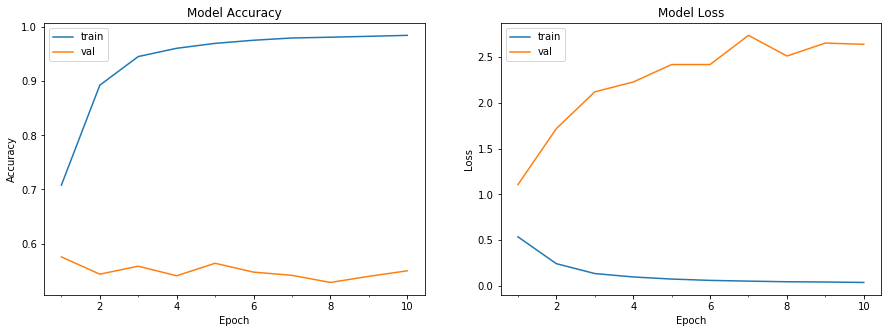

In [6]:
import numpy as np

plot_model(history)

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report

Y_pred = model.predict_generator(test_set, 600 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names = ['Real', 'PS']
print(classification_report(test_set.classes, y_pred, target_names=target_names))


Confusion Matrix
[[159 142]
 [147 154]]
Classification Report
              precision    recall  f1-score   support

        Real       0.52      0.53      0.52       301
          PS       0.52      0.51      0.52       301

   micro avg       0.52      0.52      0.52       602
   macro avg       0.52      0.52      0.52       602
weighted avg       0.52      0.52      0.52       602

